## Colab Notebook created for ARAP module at UPC ETSETB.

Authors: Juan José Nieto, Josep Vidal, Margarita Cabrera-Bean

**Martí Farré i Adriana Díaz**

# GRID WORLD
[Open to access description of tasks](https://drive.google.com/file/d/1PUpvtq1mXGLIxYcksXuR4Nr7WmV0ILkJ/view)

## Complete the TODOs you'll find in the notebook:

1.  Initialize the variable POLICY pi(a|s).
2.  Initialize the corresponding rewards in *next_position* function (a).
3.  Compute the reward vector and the transition probability matrix (b).
4.  Compute Bellman Equation (c)
-------------------------------------------------
5.  PREDICTION Compute update of the state value (IPE,d)
6.  CONTROL Program Policy Iteration Algorithm (PI,e)
7.  CONTROL Program Value Iteration Algorithm (VI,f)






In [ ]:
import numpy as np
import seaborn as sns

from random import random
import matplotlib.pyplot as plt

In [ ]:
class Grid():
    def __init__(self):
        self.N_ROWS = 5
        self.N_COLUMNS = 5
        self.N_STATES = self.N_ROWS * self.N_COLUMNS

        self.GAMMA = 0.9
        self.ZETA_MAX = 1e-3
        self.ITER_MAX = 100

        self.ACTIONS = [(0, -1), (1, 0), (0, 1), (-1, 0)]
        self.N_ACTIONS = 4

        # 1.TODO: Initialize with equal probability for each action in each state (a)
        self.POLICY = (1/4)*np.ones((self.N_STATES,self.N_ACTIONS))

        self.SPC_STATES = [(6, 10, 10), (16, 18, 5)] # (ini state, fin state, reward)

        self.TrPrM = np.zeros((self.N_STATES, self.N_STATES))
        self.V_FUNCTION = np.zeros(self.N_STATES)
        self.REWARD = np.zeros(self.N_STATES)


    ''' Convert state s from scalar to coordinates x,y '''
    def get_XY(self, state):
        state -= 1
        return (state % self.N_ROWS, int(state / self.N_ROWS))

    ''' Convert coordinates x,y to scalar state '''
    def get_state(self, state):
        return state[1]*self.N_COLUMNS + state[0] + 1


    '''
    Check if state is special

    Params:
        - int: state [1,...,25]
    Returns:
        - bool: is_special
        - int: next_state
        - int: reward
    '''
    def is_special(self, state):
        for spc in self.SPC_STATES:
            if spc[0] == state:
                return True, spc[1], spc[2]
        return False, None, None



    '''
    Computes next state and reward

    Params:
        - int: state [1,...,25]
    Returns:
        - int: next_state
        - int: reward
    '''
    def next_position(self, state, action):
        (x,y) = self.get_XY(state)
        (ax, ay) = self.ACTIONS[action]

        next_state = (x + ax, y + ay)

        special = self.is_special(state)    # returns (is_special, next_state, reward)

        # 2.TODO: Complete the TODOs with the corresponding rewards(b)
        if special[0]:                                                  # special state
            return special[1], special[2]

        elif next_state[0] > -1 and next_state[0] < self.N_ROWS and \
            next_state[1] > -1 and next_state[1] < self.N_COLUMNS:      # agent within the limits of the grid

            next_state = self.get_state(next_state)
            return next_state, 0

        else:                                                           # agent is trying to overpass the limits of the grid
            return state, -1


### Plot functions

In [ ]:
'''Insert title, and axis labels to plots'''
def insert_labels(labels, ax):
    if 'title' in labels:
        ax.set_title(labels['title'])
    if 'xlabel' in labels:
        ax.set_xlabel(labels['xlabel'])
    if 'ylabel' in labels:
	    ax.set_ylabel(labels['ylabel'])


'''Plot for showing value functions'''
def plot_heatmap(data, **kwargs):
    fig, ax = plt.subplots()
    sns.heatmap(data, cmap='coolwarm')
    insert_labels(kwargs, ax)

'''Plot for showing how the difference of state-values decrease over time'''
def plot_deltas(data, **kwargs):
    fig, ax = plt.subplots()
    plt.plot(data)
    insert_labels(kwargs, ax)

'''Policy plots. Indicates action taken in each state.'''
def plot_arrow(data, actions, **kwargs):

    fig, ax = plt.subplots()

    U = np.array([[actions[y][0] for y in x] for x in data])
    V = np.array([[actions[y][1] for y in x] for x in data])

    X = np.arange(0, 5, 1)
    Y = np.arange(0, 5, 1)

    q = ax.quiver(X, Y, V, U*-1)
    plt.imshow(data, cmap=plt.cm.Pastel1)


    insert_labels(kwargs, ax)
    ax.axis('off')
    plt.show()


'''Group of N policy plots.'''
def plot_arrows(data, actions):
    # Only pick 3 first actions matrices and last one (optimal policy)
    num_policies = len(data)

    fdata = data[:min(3, num_policies)] + data[-1:]


    fig, ax = plt.subplots(1, len(fdata), figsize=(20,6))
    for i, d in enumerate(fdata):

        U = np.array([[actions[y][0] for y in x] for x in d])
        V = np.array([[actions[y][1] for y in x] for x in d])

        X = np.arange(0, 5, 1)
        Y = np.arange(0, 5, 1)

        q = ax[i].quiver(X, Y, V, U*-1)
        ax[i].imshow(d, cmap=plt.cm.Pastel1)
        labels = {
            'title': '{} Policy'.format(i if len(fdata)-1 > i else 'Optimal'),
        }
        insert_labels(labels, ax[i])
        ax[i].axis('off')

    plt.show()


## TRANSITION PROBABILITY MATRIX AND VALUE FUNCTION (b,c) FOR THE UNIFORM POLICY

In [ ]:
grid = Grid()
for s in range(1, grid.N_STATES + 1):
    for a in range(grid.N_ACTIONS):

        next_state, reward = grid.next_position(s, a)
        # 3.TODO: Compute reward vector and transition prob matrix.
        grid.TrPrM[s-1, next_state-1] += grid.POLICY[s-1,a]
        grid.REWARD[s-1] += reward*grid.POLICY[s-1,a]

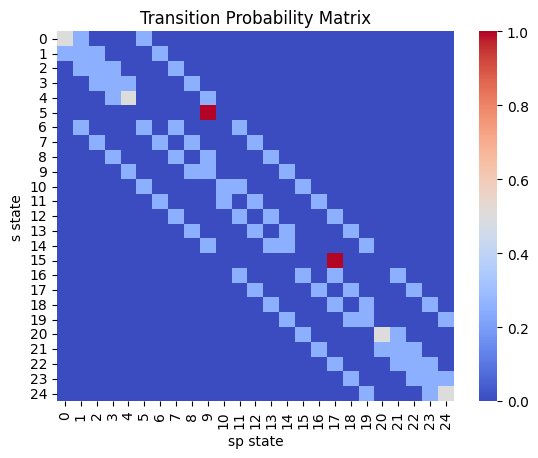

In [ ]:
# PLOT TRANSITION MATRIX
conf = {
    'title': 'Transition Probability Matrix',
    'xlabel': 'sp state',
    'ylabel': 's state'
}
plot_heatmap(grid.TrPrM, **conf)

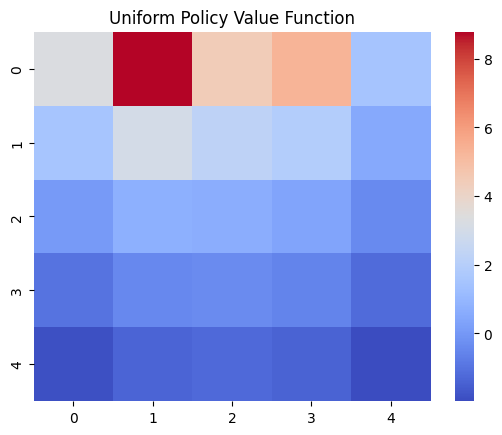

In [ ]:
# COMPUTE UNIFORM POLICY VALUE FUNCTION AND PLOT IT

# 4.TODO: Compute Bellman Equation

value_f = np.matmul(np.linalg.inv((np.eye(grid.N_STATES)-grid.GAMMA*grid.TrPrM)),np.transpose(grid.REWARD))

vf_matrix = np.transpose(np.reshape(value_f, (grid.N_ROWS, grid.N_COLUMNS)))
conf = {
    'title': 'Uniform Policy Value Function',
}
plot_heatmap(vf_matrix, **conf)

## ITERATIVE POLICY EVALUATION (IPE,d)

In [ ]:
'''
In this case we define a function since we will use this algorithm
within 'policy iteration' algorithm
'''
def policy_evaluation(grid):
    zeta = grid.ZETA_MAX + 1
    iter = 0
    v_incr = []

    while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:

        vm_aux = grid.V_FUNCTION.copy()                                 # Store current state-values for later comparison

        for s in range(1, grid.N_STATES + 1):                           # Loop over all the states
            vs_aux = 0
            for a in range(grid.N_ACTIONS):                             # Loop over all actions in each state
                next_state, reward = grid.next_position(s, a)           # Compute next_state and reward when taking action a in state s

                 # 5.TODO: Compute the update of the state value
                vs_aux += grid.TrPrM[s-1,a] + grid.POLICY[s-1,a] * (reward+grid.GAMMA*grid.V_FUNCTION[next_state - 1])


            grid.V_FUNCTION[s - 1] = vs_aux                             # Update state-value with the result of Bellman Equation

        zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))                 # Compute the difference between current state-values and previous ones
        v_incr.append(zeta)
        iter += 1

    return v_incr

In [ ]:
grid = Grid()
v_incr = policy_evaluation(grid)

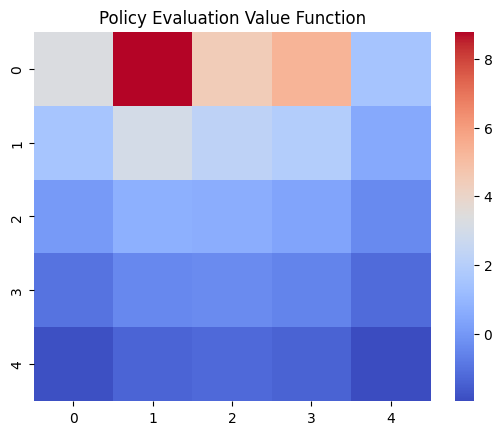

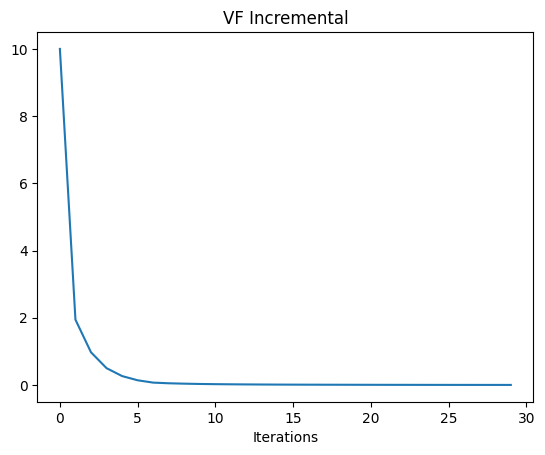

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Evaluation Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


## POLICY ITERATION  (PI,e)

In [ ]:
grid = Grid()

iter = 0
it_max = 10
ac_dif = 1

actions_list = []       # Store actions taken in each state for each run. [[a1, ... , a25], ... , [a1, ... , a25]]
a_inc = []              # Store number of different actions taken in each run.

while ac_dif > 0 and iter < it_max + 1:
    ac_dif = 0
    actions = []        # Store actions taken in each state in one run. [a1, ..., a25]

# 6.TODO: Program Policy Iteration Algorithm (you must make use of policy_evaluation function)
    # Policy evaluation
    v_incr = policy_evaluation(grid)

    policy_stable = True

    # Policy improvement
    for s in range(1, grid.N_STATES + 1):
      old_action = np.argmax(grid.POLICY[s - 1])
      q = np.zeros(grid.N_ACTIONS)

      for a in range(grid.N_ACTIONS):
        next_state, reward = grid.next_position(s, a)
        q_a = reward + grid.GAMMA * grid.V_FUNCTION[next_state-1]
        q[a] = q_a

      best_action = np.argmax(q)

      if old_action != best_action:
        policy_stable = False
        ac_dif +=1

      actions.append(best_action)

      # update policy
      grid.POLICY[s-1] = np.zeros(grid.N_ACTIONS)
      grid.POLICY[s-1][best_action] = 1

    actions_list.append(np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS)))
    a_inc.append(ac_dif)

    if policy_stable == True:
      break

    iter += 1


In [ ]:
iter

2

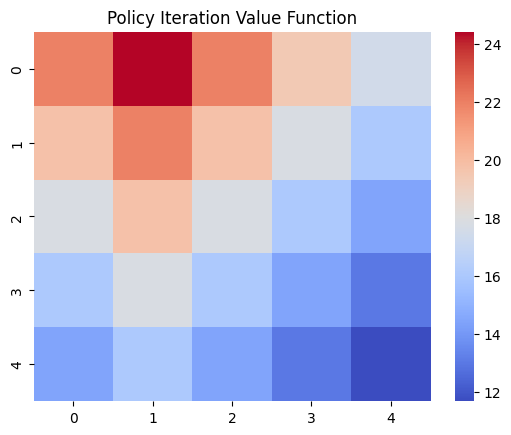

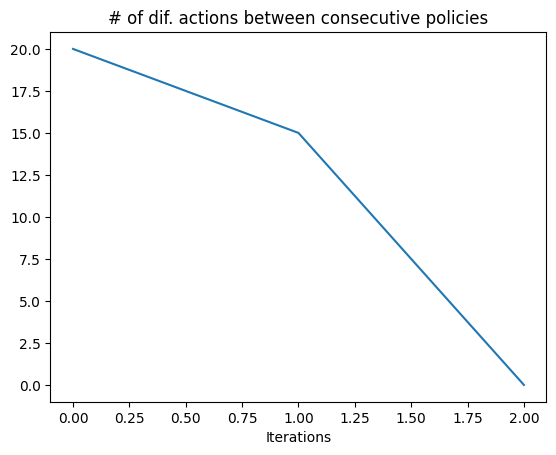

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)



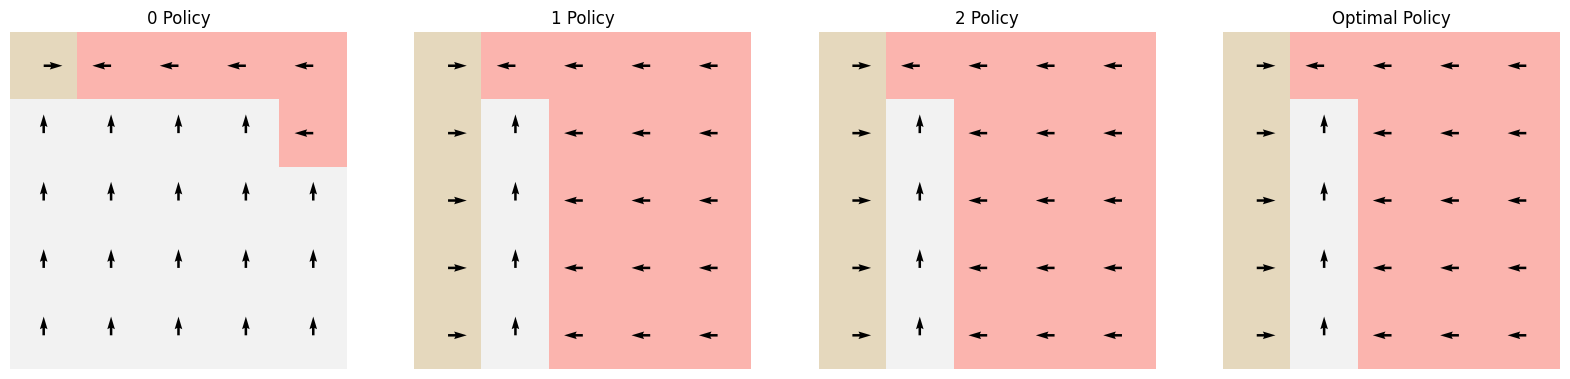

In [ ]:
plot_arrows(actions_list, grid.ACTIONS)

## VALUE ITERATION (VI,f)

In [ ]:
grid = Grid()
zeta = grid.ZETA_MAX + 1
iter = 0
v_incr = []
a_inc = []

while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:
    ac_dif = 0
    vm_aux = grid.V_FUNCTION.copy()

    # 7.TODO: Program Value Iteration Algorithm (do NOT make use of policy_evaluation function)
    for s in range(1, grid.N_STATES + 1):
      q = np.zeros(grid.N_ACTIONS)
      max_action_value = float('-inf')
      old_action = np.argmax(grid.POLICY[s-1])


      # Find the action that maximizes the value function
      for a in range(grid.N_ACTIONS):
        next_state, reward = grid.next_position(s, a)
        vs_aux = reward + grid.GAMMA * grid.V_FUNCTION[next_state-1]
        q[a] = vs_aux

        if vs_aux > max_action_value:
          max_action_value = vs_aux
          new_action = a

      # Update the value function with the maximum action value
      grid.V_FUNCTION[s - 1] = max_action_value

      if old_action != new_action:
        ac_dif += 1

      # Update the policy for the current state
      grid.POLICY[s - 1] = np.zeros(grid.N_ACTIONS)
      grid.POLICY[s - 1][new_action] = 1

    #####

    a_inc.append(ac_dif)                                # Number of actions taken differently from previous iteration
    zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))     # Compute the difference of the state-values
    v_incr.append(zeta)                                 # Store the difference in v_incr list
    iter += 1


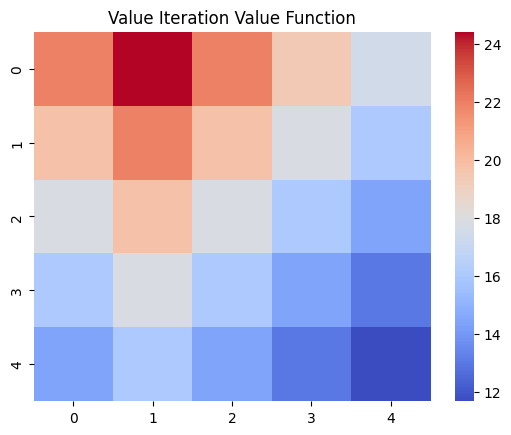

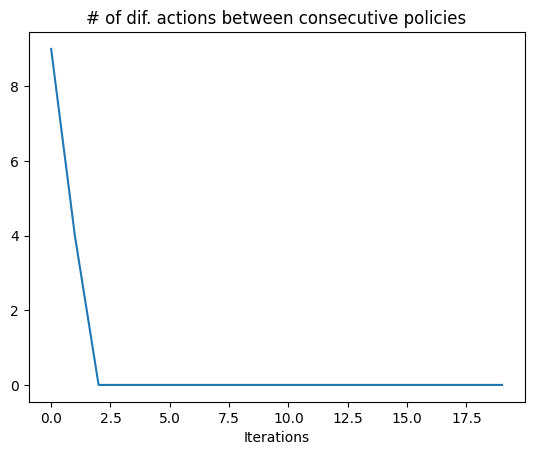

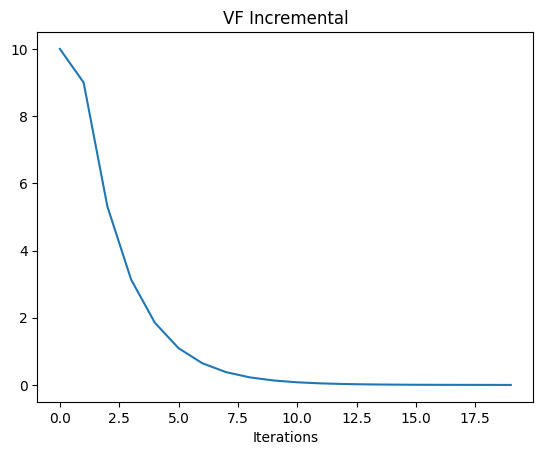

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Value Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)

conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


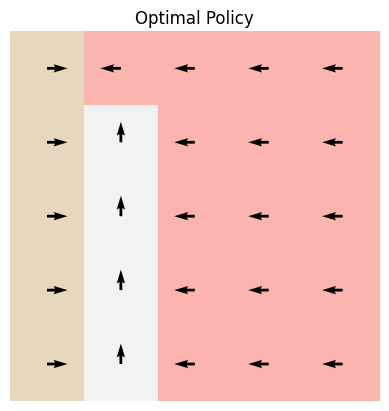

In [ ]:
conf= {
    'title': 'Optimal Policy'
}

actions = [np.argmax(grid.POLICY[s-1]) for s in range(1, grid.N_STATES + 1)]
action_arrows = np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS))
plot_arrow(action_arrows, grid.ACTIONS, **conf)



---



---



# Report

## Part 1: Markov Decision Process


**a) Initiate the variable π(a|s) by giving values for s=1,..,25 and a=1,..,4. Give reward r(s, a, s’) in function “next_position”.**

We initialized the policy with equal probabilities for each action in each state a. This was done by creating a matrix of ones with as many rows as states and as many columns as actions. After that, we multiplied it by 1/4, since all 4 actions should be equiprobable.Therefore, the initial policy was implemented with the following command:
  
    self.POLICY = (1/4)*np.ones((self.N_STATES,self.N_ACTIONS))



After that, we were asked to give the reward r(s,a,s') in the function *next_position*, which gets as input parameters a given state and an action.

To do so, we used the function *is_special*, that returns: (is_special, next_state, reward). Therefore, if the given state is indeed special (special[0] is true), the function returns as next state and reward the ones returned in *is_special* (special[1] and special[2]).

On the contrary, the ideal situation is that the agent is within the limits of the grid. If this is the case we return the next state previously defined. Furthermore, for this case, the returned reward is 0.

Finally, if the agent is trying to overpass the limits of the grid, its locations are left unchanged (we simply return *state*) and it results in a reward of -1.

The pice of code implemented was the following:

    def next_position(self, state, action):
        (x,y) = self.get_XY(state)
        (ax, ay) = self.ACTIONS[action]
        next_state = (x + ax, y + ay)
        special = self.is_special(state)    # returns (is_special, next_state, reward)

        # 2.TODO: Complete the TODOs with the corresponding rewards(b)
        if special[0]:                                                  # special state
            return special[1], special[2]
        elif next_state[0] > -1 and next_state[0] < self.N_ROWS and \
            next_state[1] > -1 and next_state[1] < self.N_COLUMNS:      # agent within the limits of the grid
            next_state = self.get_state(state)
            return next_state, 0
        else:                                                           # agent is trying to overpass the limits of the grid
            return state, -1

**b) If $\pi$  is the equiprobable random policy, obtain the reward vector $R^{\pi}$ and the probability matrix $P^{\pi}$ shown in the Bellman expectation equation system. Draw in a square image
the matrix $P^{\pi}$ or p(s’|s) taking as axis the states s (vertical axe) and s’ (horizontal axe).**

To compute the reward vector and the transition probability matrix, we iterate through the states and actions available in *Grid* and compute the next state and the action reward with the function *next_position*, for the state and action in question. After that, we add to the transition probability matrix the policy for the state and action in question. It sould be noted that we have to substract one position for every state since the state iteration is done from 1 to N_STATES+1, since Python uses zero-based indexing for lists.

Additionally, in order to update the reward vector, we add to the reward in the position marked by the state in question (s-1) the product of the reward obtained by applying the action in question per the policy.

The resulting code is:

    grid = Grid()
    for s in range(1, grid.N_STATES + 1):
      for a in range(grid.N_ACTIONS):
          next_state, reward = grid.next_position(s, a)
          # 3.TODO: Compute reward vector and transition prob matrix.
          grid.TrPrM[s-1, next_state-1] += grid.POLICY[s-1,a]
          grid.REWARD[s-1] += reward*grid.POLICY[s-1,a]

If we plot the transition probability matrix as a heat map, we get:

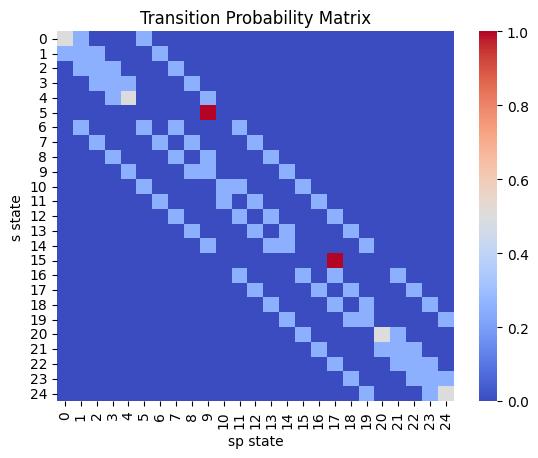

We can clearly see the special states, marked in red since the probabilities are 1. We can see that, if the agent is at the state 6 or 16, doesn't matter which action the agent takes, it will end up at the states 10 or 18 respectively, whith probability 1.

Additionally, we can observe the corner states, in gray. If the agent is in either of these states, he will remain in them with probability 0.5 since 2 of the 4 actions will make the agent leave the grid, and therefore, its location remains unchanged.

The other transition probability values are either 0.25 if the agent can move from s to s' or 0 if not.

**c) Solve the Bellman equation with a discount factor $\gamma=0.9$ and draw in a square figure (as Fig. 1) the value function of each state s: $v_{\pi}(s)$.**

We know that the state value function v(s) can be computed from the matrix Bellman equation, which is the following:

$v = (I - \gamma P)^{-1} R$
    
Threrefore, for the computation of the Bellman equation, we substract the identity matrix to the product between the $\gamma$ and the transition probability matrix. After this, we compute the inverse of the resulting matrix and multipy it with the reward (previously transposed). Later on, to compute the value function matrix, we reshape the result and transpose it. It should be noted that this time we are dealing directly with matrices, so we don't need to iterate through the states or actions.

    # COMPUTE UNIFORM POLICY VALUE FUNCTION AND PLOT IT
    # 4.TODO: Compute Bellman Equation
    value_f = np.matmul(np.linalg.inv((np.eye(grid.N_STATES)-grid.GAMMA*grid.TrPrM)),np.transpose(grid.REWARD))
    vf_matrix = np.transpose(np.reshape(value_f, (grid.N_ROWS, grid.N_COLUMNS)))
    conf = {
        'title': 'Uniform Policy Value Function',
    }
    plot_heatmap(vf_matrix, **conf)

If we plot a heatmap with the resulting value function matrix, we obtain the following:

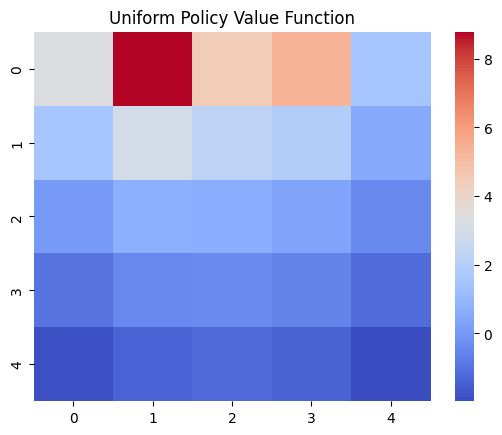

We can observe that the state 6 is the one that has higher value function. Additionally, the states 16, 11, 1 and 7 have a value function between 8 and 4 approximately. The rest of the states have lower values: less than two.

## Part 2: Dynamic Programming

**d) Program the Iterative Policy Evaluation procedure to iteratively compute $v_{\pi}(s)$, for s=1,...,25. Compare the result with the one obtained in question c).**

The function policy_evalution was almost all defined. What we had to do is to compute the update of the state value. By definition, the state value follows the function:

$V(s) ← ∑ _{a} \pi(a|s) ∑ _{s',r} p(s',r | s,a) [r + \gamma V(s')] $

Nevertheless, rather than inverting the matrix equation, we will use the matrix in-place solution.

We compute this by keeping track of the sum for each state in vs_aux. This value is updated for every action, adding at each step the corresponding value of the resulting function. Once it is updated for all actions, the vs_aux is added in grid.V_FUNCTION, on the position of the corresponding state. The line of code is the following:

    vs_aux += grid.TrPrM[s-1,a] + grid.POLICY[s-1,a] * (reward+grid.GAMMA*grid.V_FUNCTION[next_state - 1])



If we plot the Policy Evaluation Value Function, we get the next heatmap:

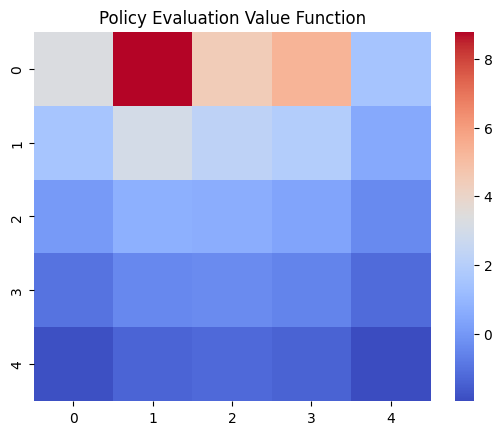

We can observe that it is the same as before, since no policy improvement has been done. Since we are using an equiprobable random policy and this is not updated, the value function of the Iterative Policy Evaluation corresponds to the solution of the Bellman equation.

Furthermore, we plot the Value Function incrementation, that is: $max_s (|v(s^{k+1}) - v(s^k)|)$

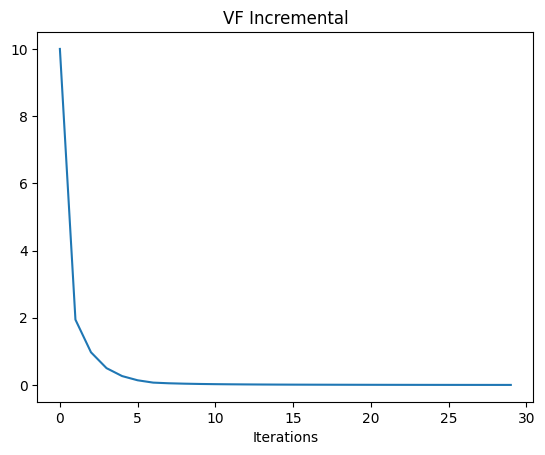

We can observe that, from iteration 6, the difference between consecutive state values (in terms of iteration) does not change. Therefore, the iteration converges to a fixed point after some iterations since $\gamma \in [0,1)$.

**e) Program the Policy Iteration Improvement procedure to iteratively compute an optimum deterministic policy A(s), for s=1,...,25, i.e. a policy such as π(a|s)=1 if A(s)=a and π(a’|s)=0 for a’<>a. Draw in square figures (as Fig. 1) the value function of each state s: $v_A(s)$ and the optimum policy A(s). You can make use of the iterative policy_evaluation function programmed in d). Add comments on the number of iterations, the $\theta$ value used. Compare $v_A(s)$ with $v_\pi(s)$ obtained in question c).**

To program the Policy Iteration Improvement, we first call the previously defined Policy Evaluation and then proceed to implement the Policy Improvement.

The Policy Improvement consists on computing *q* for each state and taking as best action for that state the one with maximum argument. If the computed best action is different than the previous one, the policy is no longer stable (and we also have to increment by one the *ac_dif*). After updating the vector that keeps track of the best actions, we update the policy for the state in question and the best actions.

Finally, when this is done for all the states, we update the vectors *actions_list* and *a_inc*. Furthermore, if the policy is still stable, we stop and return the values.

If we plot the value function for each state we get:

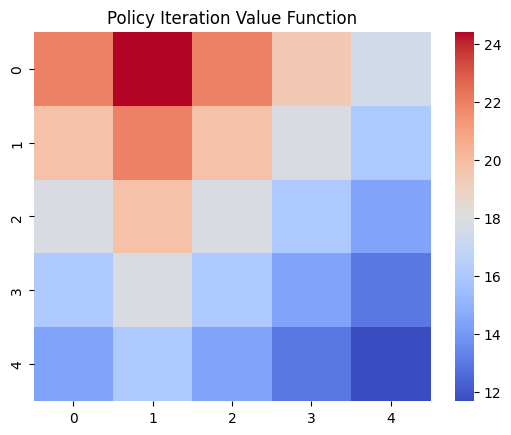

We can observe that this time the scale goes up to 24 (and not until 8, as in the previous question), being the state 6, again, the one with this maximum value function. Furthermore, states 1, 7 and 11 (the ones that are contiguous with 6) are the second ones with higher value function. Additionally, states, 2, 8, 12 and 6 (the contiguous to the previously mentioned states) are the third ones with higher value function. And this goes on for the other states.

In conclusion, we can see that the resulting value function for the Policy Iteration Implementation has the following pattern: the closest the state is to the state 6, the higher its value function, and viceversa.

If we plot the number of different actions between consecutive policies we obtain the following plot:

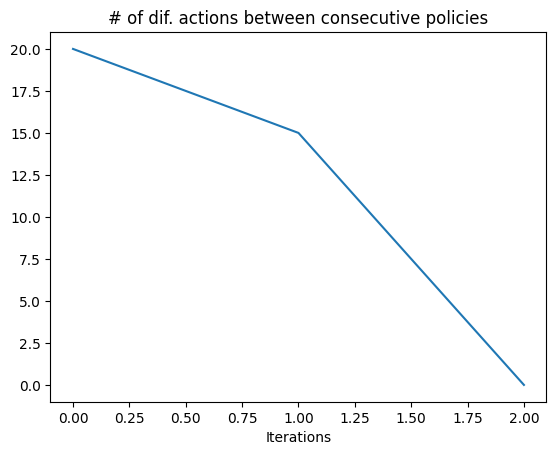

The first aspect that surprised us is the fact that it only has 2 iterations. This happens due to the fact that, inside the two iterations, the algorithm does a very good estimation of the value function, arriving already to the optimal policy with only those iterations. We can see that, at iteration 2, the number of different actions between consecutive policies is 0.

Finally, if we plot the policies for each iteration, together with the optimal one we have:

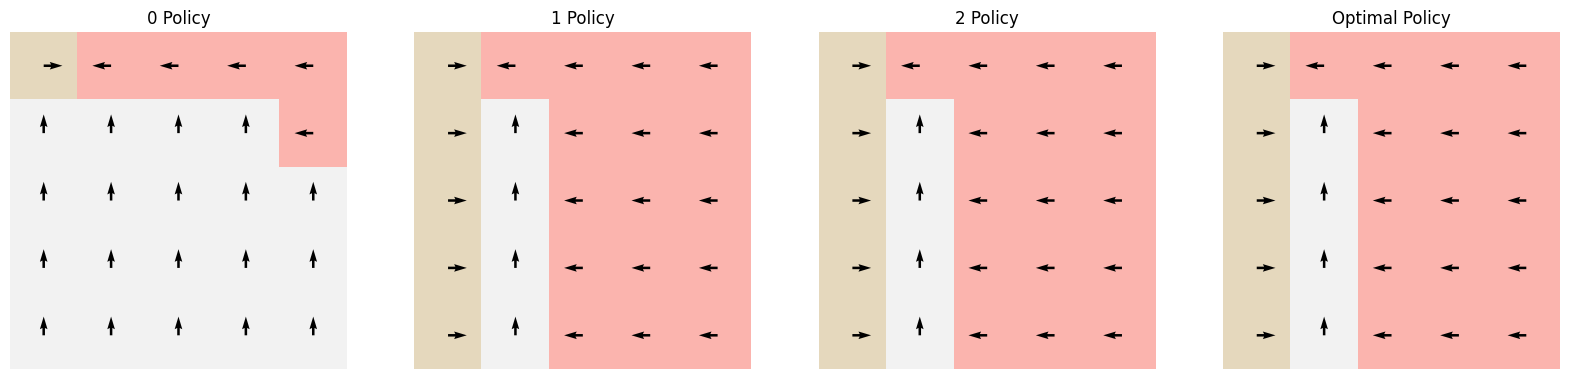

We can observe that the pattern is going towards the second column. If the agent is already in the second column, he should go up, unless obviously it is at the top one: it should go left instead.



**f) Program the Value Iteration Improvement procedure to iteratively compute an optimum deterministic policy A(s), for s=1,...,25, i.e. a policy such as π(a|s)=1 if A(s)=a and π(a’|s)=0 for a’<>a. Draw in square figures (as Fig. 1) the value function of each state s: $v_A(s)$ and the optimum policy A(s). Add comments on the number of iterations,
the $\theta$ value used. Compare $v_A(s)$ with  $v_\pi(s)$  obtained in questions c) and e).**

To program the Value Iteration Improvement procedure, we find the action that maximizes the value function, update the value function with the maximum action value found and, finally, update the policy for the current state.

If we plot the value function for the different states:

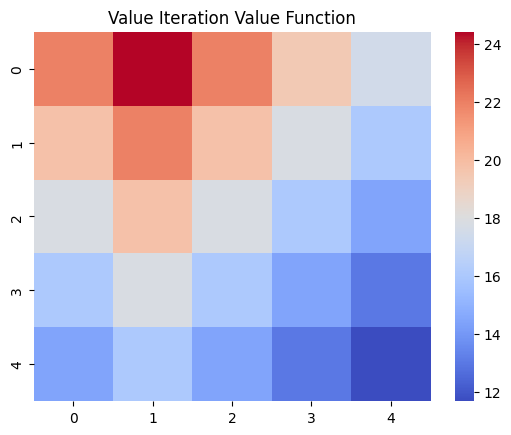

We can observe that the Value Function for the Value Iteration implementation is the same as for the Policy Iteration implementation: it follows the same distribution. If both procedures have the same value function, it means that both have converged to the same solution, and the optimal value function has been found.

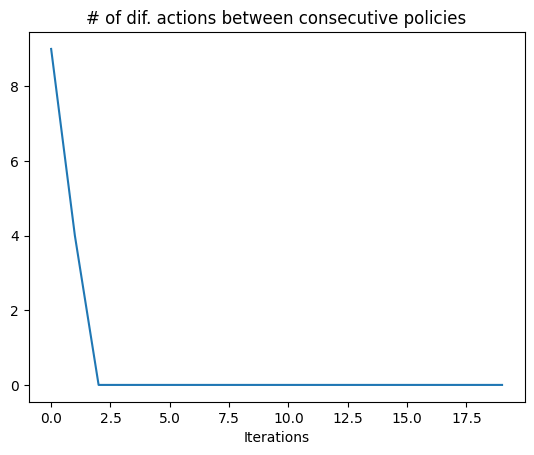

We can detect that, after iteration 2, the number of different actions between consecutive policies is 0, so the algorithm starts taking allways the same actions for the policies. Furthermore, se can observe that in the Value Iteration Improvement, the estimation is not as good, so it needs to run more iterations to arrive to the optimal policy.

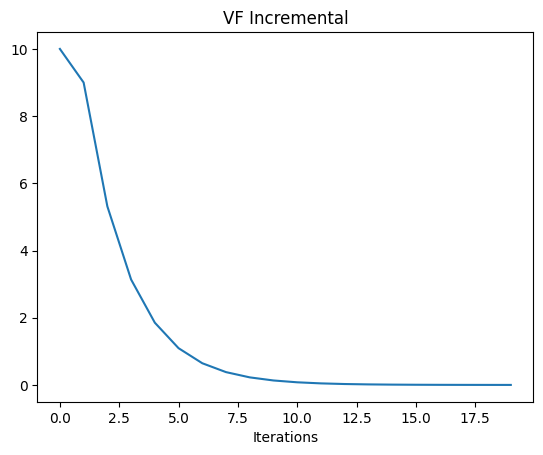

We can observe that the difference between consecutive (regarding the iterations) state values is practically 0 after iteration 7 and, furthermore, it decreases really fast for previous iterations. Therefore, the iteration converges to a fixed point after some iterations.

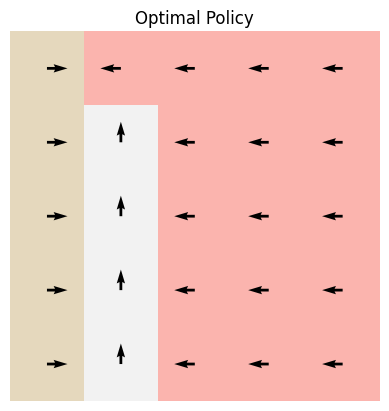

We can observe that, even though the estimation is not as good, at the end, the algorithm arrives at the same optimal policy than before, as previously interpreted from the value function plot.